In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

Dataset

In [2]:
X, Y =load_coffee_data();
print(X.shape , Y.shape)

(200, 2) (200, 1)


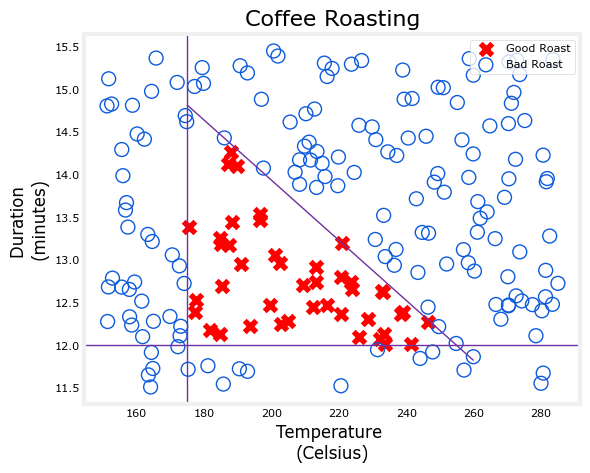

In [3]:
plt_roast(X,Y)

Noramalizing data

In [4]:

print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


In [5]:
Xt=np.tile(Xn , (1000, 1))
Yt=np.tile(Y, (1000,1))
print(Xt.shape , Yt.shape)

(200000, 2) (200000, 1)


Tensorflow Model

In [7]:
tf.random.set_seed(1234) 
model=Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid' , name='layer1'),
        Dense(1, activation='sigmoid' , name='layer2')
    ]
)

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
L1_num_params= 2*3+3
L2_num_params= 3*1+1
print("L1 params= " , L1_num_params, "L2 params = " , L2_num_params)

L1 params=  9 L2 params =  4


In [11]:
W1, b1= model.get_layer("layer1").get_weights()
W2 , b2= model.get_layer('layer2').get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.38 -0.75 -0.75]
 [-0.9  -0.18 -0.1 ]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[ 0.85]
 [ 0.67]
 [-0.1 ]] 
b2(1,): [0.]


In [12]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt , Yt,
    epochs=10,
)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.3552
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1287
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0694
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0257
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0175
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0134
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0108
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0090
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0076
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0065


Updated Weights

In [13]:
W1, b1=model.get_layer("layer1").get_weights()
W2, b2=model.get_layer("layer2").get_weights()
print("W1:\n" , W1 , "\nb1:" , b1)
print("W1:\n" , W2 , "\nb1:" , b2)

W1:
 [[13.27 -0.09 13.8 ]
 [ 0.24 11.15 11.5 ]] 
b1: [13.9  13.5   1.45]
W1:
 [[ 27.18]
 [ 26.59]
 [-35.61]] 
b1: [-35.27]


In [14]:
W1 = np.array([
    [-8.94,  0.29, 12.89],
    [-0.17, -7.34, 10.79]] )
b1 = np.array([-9.87, -9.28,  1.01])
W2 = np.array([
    [-31.38],
    [-27.86],
    [-32.79]])
b2 = np.array([15.54])
model.get_layer("layer1").set_weights([W1, b1])
model.get_layer("layer2").set_weights([W2, b2])

Predictions


In [15]:
X_test=np.array([
    [200, 13.9],
    [200, 17]
])
X_testn=norm_l(X_test)
predictions= model.predict(X_testn)
print("predictions= \n" , predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
predictions= 
 [[9.63e-01]
 [3.03e-08]]


In [19]:
yhat=np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i]>=0.5:
        yhat[i]=1
    else:
        yhat[i]=0
print(f"decisions= \n{yhat}")

decisions= 
[[1.]
 [0.]]


also can be done as:


In [20]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]


Layer Functions

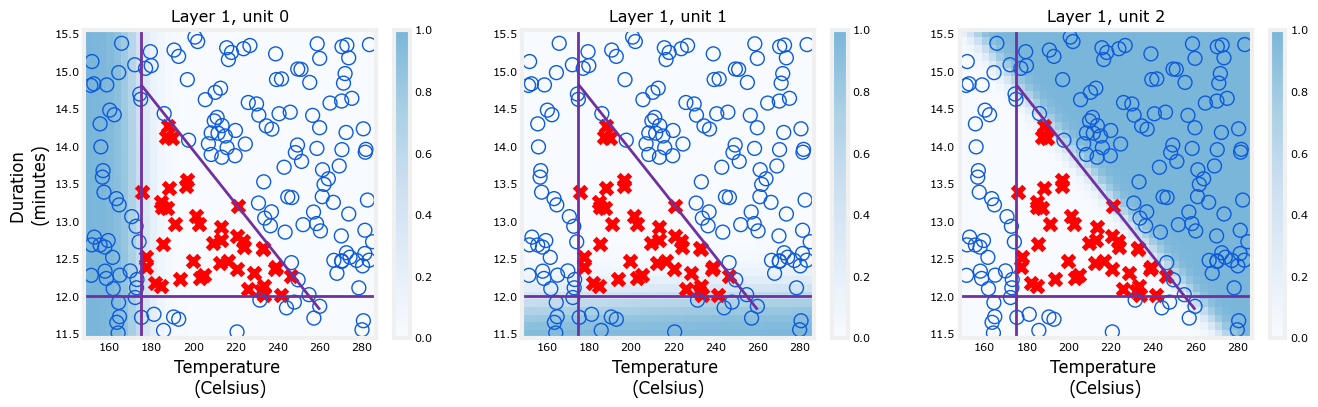

In [21]:
plt_layer(X,Y.reshape(-1,),W1,b1,norm_l)

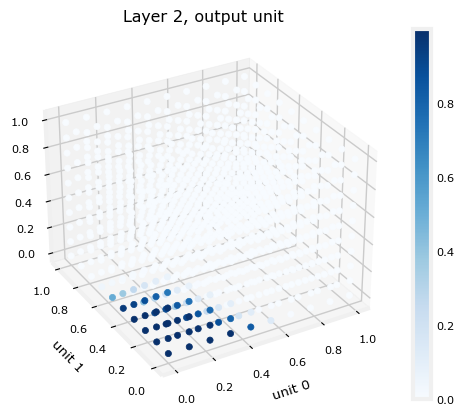

In [22]:
plt_output_unit(W2 ,b2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━

KeyboardInterrupt: 

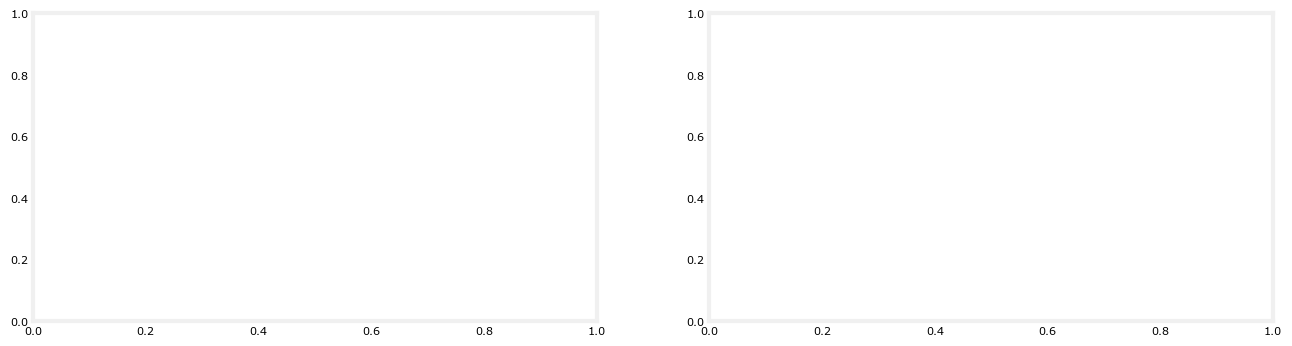

In [23]:
netf= lambda x : model.predict(norm_l(x))
plt_network(X,Y,netf)